<a href="https://colab.research.google.com/github/Sirfowahid/FFN/blob/master/FFN_weightHistograms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

labels = data[:,0]
data   = data[:,1:]

dataNorm = data / np.max(data)

In [3]:

dataT   = torch.tensor( dataNorm ).float()
labelsT = torch.tensor( labels ).long()

train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)

train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [5]:

def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      self.input = nn.Linear(784,64)
      
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      self.output = nn.Linear(32,10)

    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)
  
  net = mnistNet()
  
  lossfun = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [6]:
net = createTheMNISTNet()[0]

print('Summary of model:')
print(net)
print(' ')

Summary of model:
mnistNet(
  (input): Linear(in_features=784, out_features=64, bias=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=10, bias=True)
)
 


In [7]:
print('Summary of input layer:')
print( vars(net.input) )
print(' ')

Summary of input layer:
{'training': True, '_parameters': OrderedDict([('weight', Parameter containing:
tensor([[-2.6364e-02,  3.1077e-02, -2.5969e-02,  ..., -3.2889e-03,
         -1.3075e-02,  1.1168e-02],
        [ 1.4698e-02, -1.7170e-02, -2.0963e-03,  ...,  1.7138e-02,
          2.5381e-02,  1.0768e-02],
        [-1.7798e-02,  2.2209e-02,  2.8239e-02,  ...,  6.7545e-03,
         -3.2530e-02,  2.4753e-02],
        ...,
        [-3.2499e-02,  1.2697e-02, -1.2331e-02,  ..., -1.8104e-03,
          2.6888e-03, -1.4289e-02],
        [-2.4384e-02, -1.6817e-02, -1.6883e-02,  ..., -3.3425e-02,
         -1.3300e-02,  1.7108e-02],
        [-2.2011e-02, -2.7827e-05,  1.6564e-02,  ..., -2.7808e-02,
          1.2871e-03,  2.5005e-02]], requires_grad=True)), ('bias', Parameter containing:
tensor([ 0.0040,  0.0125,  0.0244,  0.0206, -0.0305, -0.0175,  0.0291,  0.0041,
        -0.0059, -0.0010,  0.0062, -0.0209,  0.0266, -0.0123,  0.0318,  0.0297,
         0.0035, -0.0032,  0.0191,  0.0265,  0.0100

In [8]:
print('Input layer weights:')
print( net.input.weight.shape )
print( net.input.weight )
print(' ')

Input layer weights:
torch.Size([64, 784])
Parameter containing:
tensor([[-2.6364e-02,  3.1077e-02, -2.5969e-02,  ..., -3.2889e-03,
         -1.3075e-02,  1.1168e-02],
        [ 1.4698e-02, -1.7170e-02, -2.0963e-03,  ...,  1.7138e-02,
          2.5381e-02,  1.0768e-02],
        [-1.7798e-02,  2.2209e-02,  2.8239e-02,  ...,  6.7545e-03,
         -3.2530e-02,  2.4753e-02],
        ...,
        [-3.2499e-02,  1.2697e-02, -1.2331e-02,  ..., -1.8104e-03,
          2.6888e-03, -1.4289e-02],
        [-2.4384e-02, -1.6817e-02, -1.6883e-02,  ..., -3.3425e-02,
         -1.3300e-02,  1.7108e-02],
        [-2.2011e-02, -2.7827e-05,  1.6564e-02,  ..., -2.7808e-02,
          1.2871e-03,  2.5005e-02]], requires_grad=True)
 


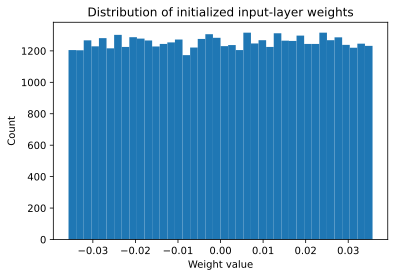

In [9]:
w = net.input.weight.detach().flatten()
plt.hist(w,40)
plt.xlabel('Weight value')
plt.ylabel('Count')
plt.title('Distribution of initialized input-layer weights')
plt.show()

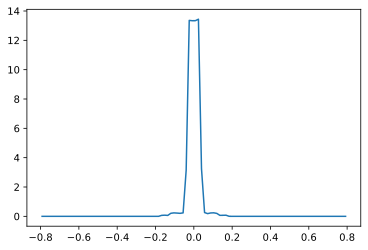

In [10]:
def weightsHistogram(net):

  W = np.array([])
  
  for layer in net.parameters():
    W = np.concatenate((W,layer.detach().flatten().numpy() ))

  histy,histx = np.histogram(W,bins=np.linspace(-.8,.8,101),density=True)
  histx = (histx[1:]+histx[:-1])/2
  return histx,histy




histx,histy = weightsHistogram(net)
plt.plot(histx,histy);

In [ ]:

def funtion2trainTheModel():

  numepochs = 100
  
  net,lossfun,optimizer = createTheMNISTNet()

  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []

  histx = np.zeros((numepochs,100))
  histy = np.zeros((numepochs,100))


  for epochi in range(numepochs):

    histx,histy[epochi,:] = weightsHistogram(net)
  
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      yHat = net(X)
      loss = lossfun(yHat,y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchLoss.append(loss.item())

      matches        = torch.argmax(yHat,axis=1) == y 
      matchesNumeric = matches.float()                
      accuracyPct    = 100*torch.mean(matchesNumeric) 
      batchAcc.append( accuracyPct )                  
  

    trainAcc.append( np.mean(batchAcc) )

    losses[epochi] = np.mean(batchLoss)

    X,y = next(iter(test_loader)) 
    with torch.no_grad(): 
      yHat = net(X)
      
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  return trainAcc,testAcc,losses,net,histx,histy
